In [1]:
!pip install mitdeeplearning
import tensorflow as tf
import mitdeeplearning as mdl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)
print("Sport is a {}-d Tensor".format(tf.rank(sport)))
print("Number is a {}-d Tensor".format(tf.rank(number)))

Sport is a 0-d Tensor
Number is a 0-d Tensor


In [3]:
sport = tf.constant(["Tennis","Basketball"], tf.string)
number = tf.constant([1.41421356237, 3.6574336, 1.4224245], tf.float64)
print("Sport is a {}-d Tensor".format(tf.rank(sport)))
print("Number is a {}-d Tensor".format(tf.rank(number)))

Sport is a 1-d Tensor
Number is a 1-d Tensor


In [4]:
matrix = tf.constant([[1.0,2.0,3.0,4.0],[5.0,6.0,7.0,8.0]])
assert isinstance(matrix,tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [5]:
images = tf.zeros([10,256,256,3])
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images) == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10,256,256,3], "matrix is incorrect shape"

In [6]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1,2]
print("Row_vector: {}".format(row_vector.numpy()))
print("Column_vector: {}".format(column_vector.numpy()))
print("Scalar_vector: {}".format(scalar.numpy()))

Row_vector: [5. 6. 7. 8.]
Column_vector: [3. 7.]
Scalar_vector: 7.0


In [7]:
a = tf.constant(15)
b = tf.constant(63)
c1 = tf.add(a,b)
c2 = a + b
print(c1,c2)

tf.Tensor(78, shape=(), dtype=int32) tf.Tensor(78, shape=(), dtype=int32)


In [8]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(DenseLayer,self).__init__()
        self.n_output_nodes = n_output_nodes
    
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])
        print(self.W.shape, self.b.shape)
    
    def call(self,x):
        z = tf.matmul(x,self.W) + self.b
        y = tf.sigmoid(z)
        return y


In [9]:
tf.random.set_seed(1)
layer = DenseLayer(3)
print(layer)
layer.build((1,2))
print(layer)
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

(2, 3) (1, 3)
[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
n_output_nodes = 3
model = Sequential()
dense_layer = Dense(n_output_nodes, activation='sigmoid')
model.add(dense_layer)

In [11]:
x_input = tf.constant([[1,2.]],shape=(1,2))
model_output = model(x_input).numpy()
print(model_output)

[[0.5607363  0.65668976 0.12496966]]


In [13]:
x =tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x * x
dy_by_dx = tape.gradient(y,x)
assert dy_by_dx.numpy() == 6.0

Initializing x=[[-0.35975078]]


Text(0, 0.5, 'x value')

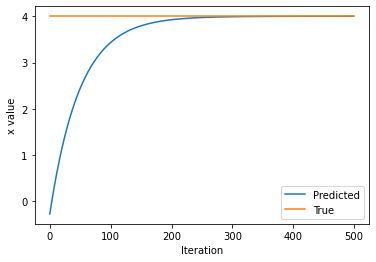

In [18]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))
learning_rate = 1e-2 
history = []
x_f = 4
for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f)**2 
    grad = tape.gradient(loss, x)
    new_x = x - learning_rate*grad 
    x.assign(new_x) 
    history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')